<a href="https://colab.research.google.com/github/sumukhasrivatsa/PyTorch-Learnings/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision.transforms import transforms 




In [38]:
#importing the data set

train_set=torchvision.datasets.CIFAR10(root="/content/TRAINDATA",train=True,download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_set=torchvision.datasets.CIFAR10(root="/content/TESTDATA",train=False,download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

Files already downloaded and verified
Files already downloaded and verified


In [39]:

#first of all , those images are objects of PIL library
#need to convert them to tensors 
#so go back and use transforms 


#transform=transforms.compose([transforms.ToTensor])

#now we just have dataset 
#we need a dataloader which brings in data from these folders 

train_loader=torch.utils.data.DataLoader(train_set,batch_size=10,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_set,batch_size=10,shuffle=True)




In [51]:
#implementing the convolutional neural network
n_total_steps = len(train_loader)
import torch.nn as nn
class netC(nn.Module):
  def __init__(self):
    super(netC,self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool1=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,15,5)
    self.pool2=nn.MaxPool2d(2,2)
    self.linearlayer1=nn.Linear(15*5*5,120)
    
    self.Linearlayer2=nn.Linear(120,60)
    self.act=nn.ReLU()
    self.linearlayer3=nn.Linear(60,10)
    self.act2=nn.Sigmoid()





  def forward(self,set):
    set=self.conv1(set)
    set=self.pool1(set)
    set=self.conv2(set)
    set=self.pool2(set)
    set=set.view(-1,15*5*5)
    set=self.linearlayer1(set)
    set=self.Linearlayer2(set)
    set=self.act(set)
    set=self.linearlayer3(set)
    set=self.act2(set)

    return set

classifier=netC()
lossfunc=nn.CrossEntropyLoss()  

optimizer=torch.optim.SGD(classifier.parameters(),0.001,)
steps=len(train_loader)
for epoch in range(10):
  for i,(images,labels) in enumerate(train_loader):
    output=classifier(images)
    loss=lossfunc(output,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{10}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/10], Step [2000/5000], Loss: 2.3093
Epoch [1/10], Step [4000/5000], Loss: 2.3045
Epoch [2/10], Step [2000/5000], Loss: 2.3056
Epoch [2/10], Step [4000/5000], Loss: 2.3011
Epoch [3/10], Step [2000/5000], Loss: 2.2980
Epoch [3/10], Step [4000/5000], Loss: 2.3062
Epoch [4/10], Step [2000/5000], Loss: 2.3012
Epoch [4/10], Step [4000/5000], Loss: 2.3029
Epoch [5/10], Step [2000/5000], Loss: 2.3004
Epoch [5/10], Step [4000/5000], Loss: 2.2943
Epoch [6/10], Step [2000/5000], Loss: 2.2992
Epoch [6/10], Step [4000/5000], Loss: 2.2925
Epoch [7/10], Step [2000/5000], Loss: 2.2482
Epoch [7/10], Step [4000/5000], Loss: 2.2904
Epoch [8/10], Step [2000/5000], Loss: 2.2616
Epoch [8/10], Step [4000/5000], Loss: 2.2272
Epoch [9/10], Step [2000/5000], Loss: 2.0636
Epoch [9/10], Step [4000/5000], Loss: 2.1666
Epoch [10/10], Step [2000/5000], Loss: 2.1168
Epoch [10/10], Step [4000/5000], Loss: 2.1883


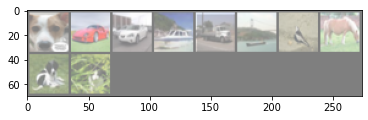

In [49]:

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [52]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        
        outputs = classifier(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(4):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 24.45 %
Accuracy of plane: 42.92929292929293 %
Accuracy of car: 19.306930693069308 %
Accuracy of bird: 12.408759124087592 %
Accuracy of cat: 21.393034825870647 %
Accuracy of deer: 18.78048780487805 %
Accuracy of dog: 35.57213930348259 %
Accuracy of frog: 6.122448979591836 %
Accuracy of horse: 15.544041450777202 %
Accuracy of ship: 34.92063492063492 %
Accuracy of truck: 31.026252983293556 %
